# Regresión

### Importación de bibliotecas requeridas

In [1]:
# Cargar bibliotecas
import pandas as pd
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Diabetes dataset

In [2]:
# Base de datos de diabetes de la India Pima
# Predecir la aparición de diabetes con base en medidas de diagnóstico
# https://www.kaggle.com/uciml/pima-indians-diabetes-database (descárguelo)

# Cargar conjunto de datos
pima = pd.read_csv("diabetes.csv")

In [3]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
pima.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df_2 = pima[pima['Outcome']==1.0];
df_2 = df_2.iloc[:, 0:-1]

In [6]:
import statsmodels.api as sm

## Construya un modelo de regresión lineal simple donde el nivel de insulina se explique por el nivel de glucosa del paciente.

independent = 'Glucose'
feature_cols = [independent]
X = df_2[feature_cols] # Características (variables independientes)
y = df_2.Insulin # Variable objetivo

## Añade intercepto/constante
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Insulin   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     19.50
Date:                Thu, 24 Apr 2025   Prob (F-statistic):           1.46e-05
Time:                        19:21:34   Log-Likelihood:                -1692.1
No. Observations:                 268   AIC:                             3388.
Df Residuals:                     266   BIC:                             3395.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -59.9798     37.214     -1.612      0.108    -133.251      13.292
Glucose        1.1349      0.257      4.416      0.000       0.629       1.641
==============================================================================
Omnibus:                       92.767   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              254.373
Skew:                           1.578   Prob(JB):                     5.80e-56
Kurtosis:                       6.581   Cond. No.                         658.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Cleaning data

In [8]:
# Replace zeros with NaN in relevant columns
cols_with_missing = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
pima[cols_with_missing] = pima[cols_with_missing].replace(0, np.nan)

# Drop rows with any missing values
pima_clean = pima.dropna()

# Update df_2 to use the cleaned data for Outcome == 1
df_2 = pima_clean[pima_clean['Outcome'] == 1.0].iloc[:, 0:-1]

# Show info of cleaned data
pima_clean.info()
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 3 to 765
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               392 non-null    int64  
 1   Glucose                   392 non-null    float64
 2   BloodPressure             392 non-null    float64
 3   SkinThickness             392 non-null    float64
 4   Insulin                   392 non-null    float64
 5   BMI                       392 non-null    float64
 6   DiabetesPedigreeFunction  392 non-null    float64
 7   Age                       392 non-null    int64  
 8   Outcome                   392 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 30.6 KB
<class 'pandas.core.frame.DataFrame'>
Index: 130 entries, 4 to 755
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               130 n

### Gráficos de residuos

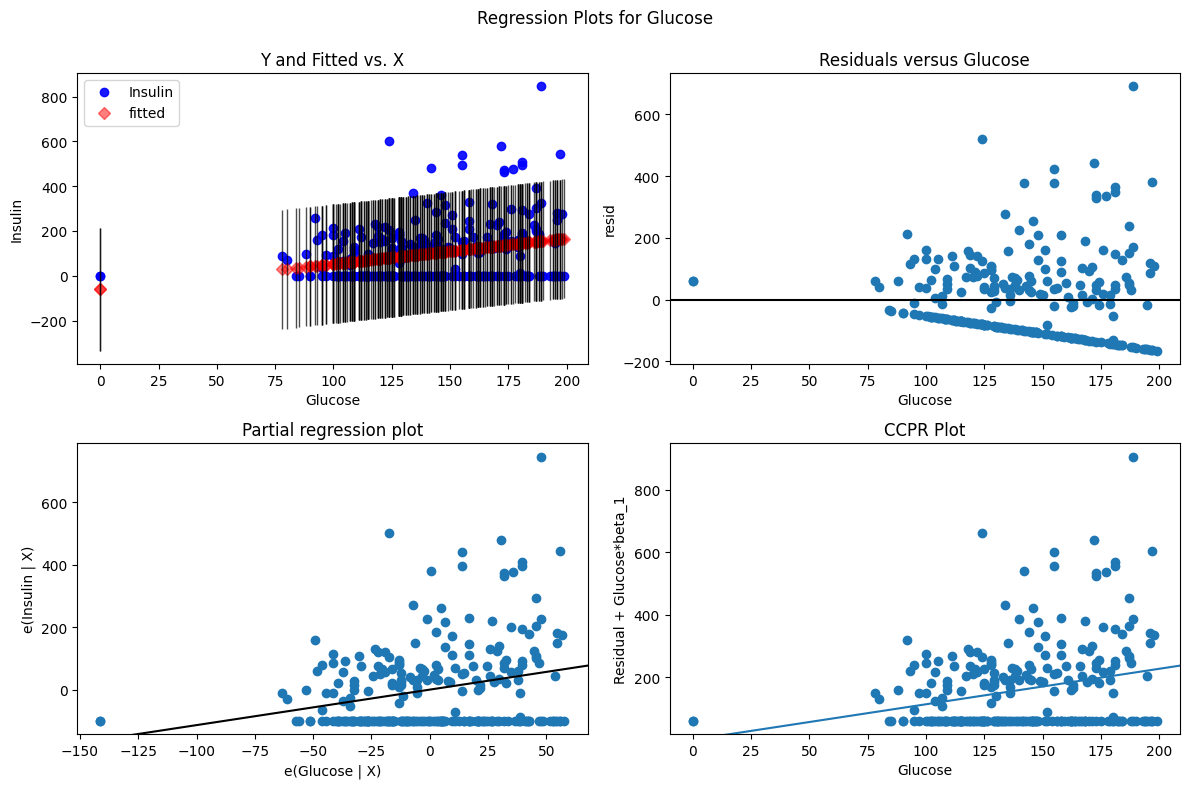

In [9]:
## Grafica los residuos del modelo
## https://www.statsmodels.org/v0.10.2/generated/statsmodels.graphics.regressionplots.plot_regress_exog.html
## https://www.statsmodels.org/devel/examples/notebooks/generated/regression_plots.html

# Define el tamaño de la figura
fig = plt.figure(figsize=(12,8))

# Produce gráficas de regresión
fig = sm.graphics.plot_regress_exog(model, independent, fig=fig)

#### Responda las siguientes preguntas:
- ¿El modelo muestra homocedasticidad?

Que un modelo muestre homocedasticidad significa que la varianza de los errores es constante a lo largo de todas las predicciones. En nuestro caso los residuos parecen aumentar a medida que el valor de la predicción aumenta, lo que indica que los datos no muestran homocedasticidad.

### Práctica 2: Modelos de regresión simple
- Entrene otros cuatro modelos de regresión simple (IMC, Edad, Grosor de la piel, Función Pedigrí de la Diabetes)
- Dibuje los residuos de cada modelo
- Elija el mejor modelo


In [ ]:
## Entrene el modelo usando el IMC para predecir la insulina.


In [ ]:
## Dibuje los residuos del modelo que usa el IMC para predecir la insulina.


In [ ]:
## Entrene el modelo usando la Edad para predecir la insulina.


In [ ]:
## Dibuje los residuos del modelo que usa la Edad para predecir la insulina.


In [ ]:
## Entrene el modelo usando el Grosor de la piel para predecir la insulina.


In [ ]:
## Dibuje los residuos del modelo que usa el Grosor de la piel para predecir la insulina.


In [ ]:
## Entrene el modelo usando DiabetesPedigreeFunction para predecir la insulina.


In [ ]:
## Dibuje los residuos del modelo que usa DiabetesPedigreeFunction para predecir la insulina.


#### El mejor modelo es el que usa __ para predecir la insulina. Su R² es __ y todos sus coeficientes son significativos.

## Regresión lineal múltiple



In [ ]:
## Construya un modelo de regresión lineal múltiple con todas las variables.
feature_cols = [ 'Glucose', 'BMI', 'Age','DiabetesPedigreeFunction','SkinThickness','Pregnancies','BloodPressure']

df_3 = df_2

X = df_3[feature_cols] # Características (variables independientes)
y = df_3.Insulin # Variable objetivo

In [ ]:
import statsmodels.api as sm
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
est.summary()

#### Responda las siguientes preguntas:
- ¿Son significativos todos los coeficientes?
- ¿Existe evidencia de multicolinealidad?

### Eliminación la multicolinealidad

In [ ]:
## Reordena las columnas estableciendo "Insulina" como última columna
df_3 = df_3[['Glucose', 'BMI', 'Age','DiabetesPedigreeFunction','SkinThickness','Pregnancies','BloodPressure','Insulin']]


In [ ]:
## Identifica la colinealidad de cada predictor mediante VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

## Imprimir el coeficiente VIF del dataframe, excepto el de la última columna.
## Un VIF > 10 indica alta multicolinealidad
def printVIF(df):
    for i in range(len(df.columns[:-1])):
        v = vif(np.matrix(df[:-1]),i)
        print("VIF for {}: {}".format(df.columns[i],round(v,2)))


In [ ]:
printVIF(df_3)

#### Responda las siguientes preguntas:
- ¿Qué variables tienen un VIF superior a 10?
- ¿Qué variables con un valor p alto deberían eliminarse?
- ¿Qué variables recomendaría VIF eliminar?

In [ ]:
# Elimina la presión arterial
df_4 = df_3[['Glucose', 'BMI', 'Age','DiabetesPedigreeFunction','SkinThickness','Pregnancies','Insulin']]

printVIF(df_4)

In [ ]:
# Elimina la glucosa
df_4 = df_3[['BMI', 'Age','DiabetesPedigreeFunction','SkinThickness','Pregnancies','Insulin']]

printVIF(df_4)

#### Responda las siguientes preguntas:
- ¿Por qué cambian todos los coeficientes VIF al eliminar una característica?
- ¿Podríamos entrenar un modelo sin multicolinealidad con estas 5 variables?

In [ ]:
feature_cols = ['BMI', 'Age','DiabetesPedigreeFunction','SkinThickness','Pregnancies']
X = df_4[feature_cols] # Características (variables independientes)
y = df_4.Insulin # Variable objetivo

X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
est.summary()

#### Responda las siguientes preguntas:
- ¿Sigue existiendo multicolinealidad?
- ¿Son significativos todos los coeficientes?
- ¿Es significativa la intersección con el eje X?
- ¿Qué variable deberíamos eliminar a continuación?

In [ ]:
## Eliminar DiabetesPedigreeFunction
feature_cols = ['BMI', 'Age','SkinThickness','Pregnancies']
X = df_4[feature_cols] # Features (independent variables)
y = df_4.Insulin # Target variable

X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
est.summary()

In [ ]:
## Eliminar embarazos
feature_cols = ['BMI', 'SkinThickness','Age']
X = df_4[feature_cols] # Características (variables independientes)
y = df_4.Insulin # Variable objetivo

X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
est.summary()

In [ ]:
## Eliminar el intercepto
feature_cols = ['BMI', 'SkinThickness','Age']
X = df_4[feature_cols] # Características (variables independientes)
y = df_4.Insulin # Variable objetivo

#X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
est.summary()

In [ ]:
## Eliminar el IMC
feature_cols = ['SkinThickness','Age']
X = df_4[feature_cols] # Características (variables independientes)
y = df_4.Insulin # Variable objetivo

#X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
est.summary()

#### Answer the following questions:
#### Responda las siguientes preguntas:
- ¿Es significativo este modelo?
- ¿Podemos usarlo para predecir el nivel de insulina?
- ¿Cómo es la ecuación del modelo?
- Revise la evolución del error

### Selección de características



#### Haga modelos con Ridge, LASSO y Elastic Net (con validación cruzada).
#### Conteste las siguientes preguntas:
- ¿Cuáles son los 2 mejores modelos?
- ¿Cuál de estos modelos es el mejor (de acuerdo al R2 y la F-statistic)?
- ¿Cuáles parecen ser los coeficientes más relevantes?